<a href="https://colab.research.google.com/github/yrahul3910/fastai-course/blob/master/Lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data cleaning and production; SGD from scratch

## Downloading data from Google Images

* Go to Google Images, and search for whatever you want.
* Keep scrolling till you get enough
* Open up the Dev Console and type the following code

```javascript
urls = Array.from(document.querySelectorAll(".rg_di .rg_meta")).map(el => JSON.parse(el.textContent).ou);
window.open("data:text/csv;charset=utf-8," + escape(urls.join("\n")));
```

* Repeat this for all other classes as well.

In [0]:
from fastai import *
from fastai.vision import *
import urllib.request

In [2]:
help(download_images)

Help on function download_images in module fastai.vision.data:

download_images(urls:Collection[str], dest:Union[pathlib.Path, str], max_pics:int=1000, max_workers:int=8, timeout=4)
    Download images listed in text file `urls` to path `dest`, at most `max_pics`



In [3]:
help(download_data)

Help on function download_data in module fastai.datasets:

download_data(url:str, fname:Union[pathlib.Path, str]=None, data:bool=True) -> pathlib.Path
    Download `url` to destination `fname`.



In [0]:
def fetch_data(class_names: list, urls: list) -> None:
  """
  Creates directory for the each class, and download the images
  for each class from the corresponding URL, that points to links
  
  Args:
  =====
  class_names: List of class names
  urls: List of URLs
  """
  for i in range(len(class_names)):
      cur_class = class_names[i]
      cur_url = urls[i]
      
      # Create directory for class
      path = Path('data/')
      dest = path/cur_class  # Use the new pathlib syntax
      dest.mkdir(parents=True, exist_ok=True)
      
      # Download list of URLs
      urllib.request.urlretrieve(cur_url, cur_class + '.txt')
      
      # Download images
      print('Fetching data for class', cur_class)
      filename = cur_class + '.txt'
      download_images(filename, dest)

In [10]:
class_names = ['ariana', 'camila', 'katy', 'selena', 'taylor']
urls = ['https://raw.githubusercontent.com/yrahul3910/fastai-course/master/Lesson_2/' + x + '.txt' for x in class_names]
print(urls)

['https://raw.githubusercontent.com/yrahul3910/fastai-course/master/Lesson_2/ariana.txt', 'https://raw.githubusercontent.com/yrahul3910/fastai-course/master/Lesson_2/camila.txt', 'https://raw.githubusercontent.com/yrahul3910/fastai-course/master/Lesson_2/katy.txt', 'https://raw.githubusercontent.com/yrahul3910/fastai-course/master/Lesson_2/selena.txt', 'https://raw.githubusercontent.com/yrahul3910/fastai-course/master/Lesson_2/taylor.txt']


In [23]:
fetch_data(class_names, urls)

Fetching data for class ariana


Fetching data for class camila


Fetching data for class katy


Error https://cdn.primedia.co.za/primedia-broadcasting/image/upload/c_fill,h_289,w_463/dpeoniidu2bkzfsdptgq HTTPSConnectionPool(host='cdn.primedia.co.za', port=443): Max retries exceeded with url: /primedia-broadcasting/image/upload/c_fill,h_289,w_463/dpeoniidu2bkzfsdptgq (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))
Error https://www.washingtonpost.com/resizer/jSchT93ySGVWlDF9X6posMARc_E=/480x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/E3LRPDSVN5GFNAFX235JJJSDBQ.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Fetching data for class selena


Fetching data for class taylor


Error https://hits-93-toronto.radio-site.com/upload/artistes/normal/58e74733a08918.59632668.png HTTPSConnectionPool(host='hits-93-toronto.radio-site.com', port=443): Max retries exceeded with url: /upload/artistes/normal/58e74733a08918.59632668.png (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))
Error https://www.washingtonpost.com/resizer/7k_9kGFslAaaiGs_Q0K8dZ_HgBw=/480x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/JBZPDXPHZ45JLCOUMVG6FX5JMQ.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)


## Verify Images

In [26]:
for c in class_names:
    print('Verifying class', c)
    
    path = Path('data/')
    verify_images(path/c, delete=True)

Verifying class ariana


Image data/ariana/00000302.jpg has 1 instead of 3 channels
Image data/ariana/00000200.png has 1 instead of 3 channels
Image data/ariana/00000146.png has 4 instead of 3 channels
Image data/ariana/00000264.png has 4 instead of 3 channels
Image data/ariana/00000053.png has 4 instead of 3 channels
Image data/ariana/00000070.png has 4 instead of 3 channels
Image data/ariana/00000174.png has 4 instead of 3 channels
Image data/ariana/00000142.png has 4 instead of 3 channels
Image data/ariana/00000127.gif has 1 instead of 3 channels
Image data/ariana/00000195.gif has 1 instead of 3 channels
Image data/ariana/00000230.jpg has 1 instead of 3 channels
Image data/ariana/00000235.gif has 1 instead of 3 channels
Image data/ariana/00000047.png has 4 instead of 3 channels
Image data/ariana/00000145.png has 4 instead of 3 channels
Image data/ariana/00000239.png has 1 instead of 3 channels
Image data/ariana/00000280.gif has 1 instead of 3 channels
Image data/ariana/00000273.png has 4 instead of 3 channe

cannot identify image file <_io.BufferedReader name='data/camila/00000179.jpg'>
cannot identify image file <_io.BufferedReader name='data/camila/00000200.jpg'>
cannot identify image file <_io.BufferedReader name='data/camila/00000017.jpg'>
cannot identify image file <_io.BufferedReader name='data/camila/00000002.jpg'>
Image data/camila/00000049.jpg has 1 instead of 3 channels
Image data/camila/00000029.png has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/camila/00000069.jpg'>
Image data/camila/00000139.png has 4 instead of 3 channels
Image data/camila/00000184.gif has 1 instead of 3 channels
Image data/camila/00000239.jpg has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/camila/00000099.jpg'>
Verifying class katy


cannot identify image file <_io.BufferedReader name='data/katy/00000161.jpg'>
cannot identify image file <_io.BufferedReader name='data/katy/00000109.png'>
Image data/katy/00000125.png has 4 instead of 3 channels
Image data/katy/00000217.gif has 1 instead of 3 channels
Image data/katy/00000205.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/katy/00000311.jpg'>
cannot identify image file <_io.BufferedReader name='data/katy/00000085.jpg'>
Image data/katy/00000015.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/katy/00000235.jpg'>
cannot identify image file <_io.BufferedReader name='data/katy/00000171.jpg'>
Image data/katy/00000148.jpg has 1 instead of 3 channels
Image data/katy/00000039.jpg has 4 instead of 3 channels
Image data/katy/00000298.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/katy/00000159.jpg'>
Image data/katy/00000003.gif has 1 instead of 3 channel

cannot identify image file <_io.BufferedReader name='data/selena/00000282.jpg'>
cannot identify image file <_io.BufferedReader name='data/selena/00000057.jpg'>
Image data/selena/00000268.gif has 1 instead of 3 channels
Image data/selena/00000021.jpg has 1 instead of 3 channels
Image data/selena/00000078.gif has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/selena/00000291.jpg'>
Image data/selena/00000120.png has 1 instead of 3 channels
Image data/selena/00000289.png has 1 instead of 3 channels
Image data/selena/00000099.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/selena/00000211.jpg'>
Image data/selena/00000096.png has 4 instead of 3 channels
Image data/selena/00000055.png has 4 instead of 3 channels
Image data/selena/00000213.png has 1 instead of 3 channels
Image data/selena/00000212.gif has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/selena/00000065.jpg'>
Image data

cannot identify image file <_io.BufferedReader name='data/taylor/00000072.jpg'>
Image data/taylor/00000287.png has 4 instead of 3 channels
Image data/taylor/00000186.png has 4 instead of 3 channels
Image data/taylor/00000220.jpg has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/taylor/00000256.jpg'>
Image data/taylor/00000148.png has 4 instead of 3 channels
Image data/taylor/00000162.jpg has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/taylor/00000108.jpg'>
Image data/taylor/00000316.png has 4 instead of 3 channels
Image data/taylor/00000094.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/taylor/00000204.jpg'>
cannot identify image file <_io.BufferedReader name='data/taylor/00000079.jpg'>
Image data/taylor/00000166.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/taylor/00000226.jpeg'>
Image data/taylor/00000268.png has 4 instead of

## View Data

In [0]:
data = ImageDataBunch.from_folder(Path('data/'), train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

In [28]:
data.classes

['ariana', 'camila', 'katy', 'selena', 'taylor']

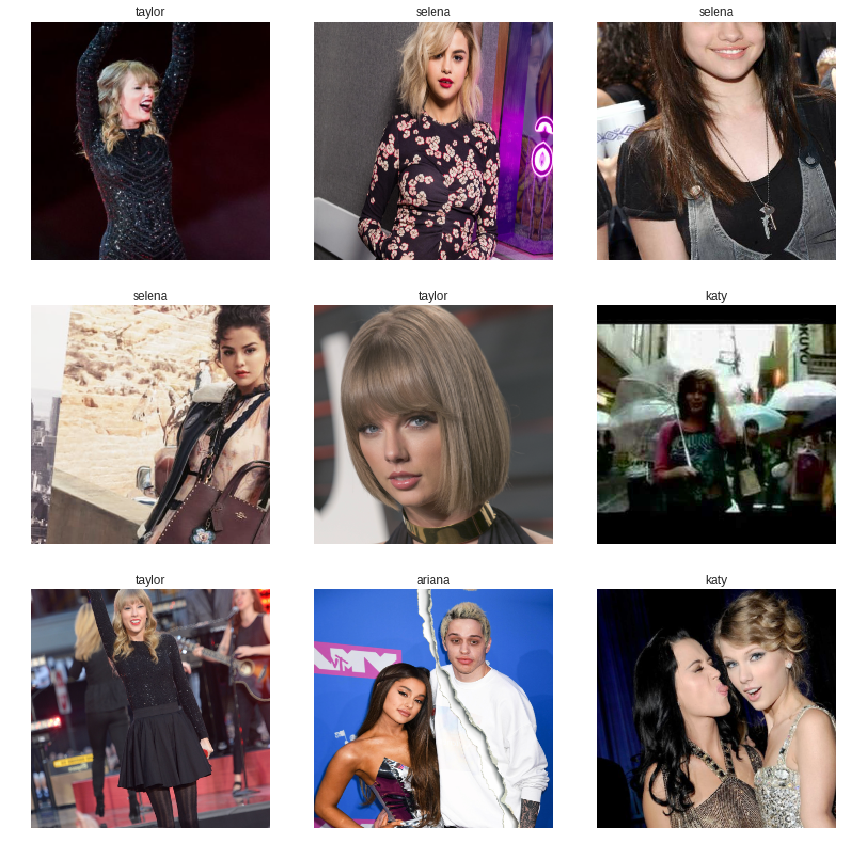

In [29]:
data.show_batch(rows=3)

In [30]:
len(data.train_ds), len(data.valid_ds)

(1248, 311)

## Train Model

In [31]:
learn = create_cnn(data, models.resnet50, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 95698893.49it/s]


In [32]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,accuracy
1,1.658724,1.142216,0.450161,0.549839
2,1.303162,1.091916,0.395498,0.604502
3,1.124624,0.946587,0.331190,0.668810
4,0.968931,0.911652,0.315113,0.684887
5,0.830666,0.868096,0.324759,0.675241
6,0.715057,0.845117,0.302251,0.697749
7,0.617733,0.846441,0.292605,0.707395
8,0.537106,0.839630,0.299035,0.700965
9,0.478536,0.820831,0.295820,0.704180
10,0.426044,0.826900,0.302251,0.697749


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [35]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


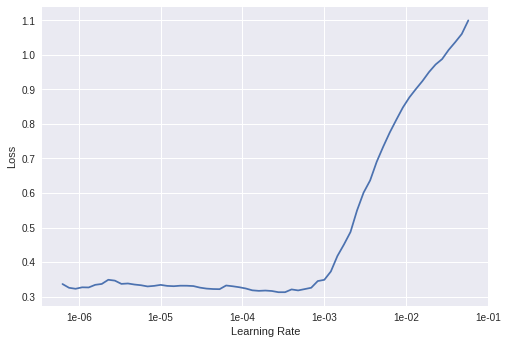

In [36]:
learn.recorder.plot()

You're looking for a downward slope in this graph.

In [37]:
learn.fit_one_cycle(2, max_lr=slice(5e-6, 5e-5))

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.348365,0.814675,0.292605,0.707395
2,0.321196,0.814789,0.289389,0.710611


In [0]:
learn.save('stage-2')

## Interpretation

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

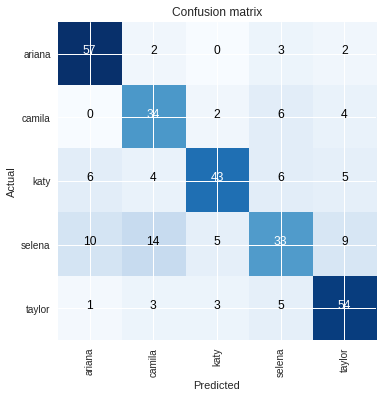

In [40]:
interp.plot_confusion_matrix()

In [41]:
interp.most_confused()

[('selena', 'camila', 14),
 ('selena', 'ariana', 10),
 ('selena', 'taylor', 9),
 ('camila', 'selena', 6),
 ('katy', 'ariana', 6),
 ('katy', 'selena', 6),
 ('katy', 'taylor', 5),
 ('selena', 'katy', 5),
 ('taylor', 'selena', 5),
 ('camila', 'taylor', 4),
 ('katy', 'camila', 4),
 ('ariana', 'selena', 3),
 ('taylor', 'camila', 3),
 ('taylor', 'katy', 3),
 ('ariana', 'camila', 2),
 ('ariana', 'taylor', 2),
 ('camila', 'katy', 2)]

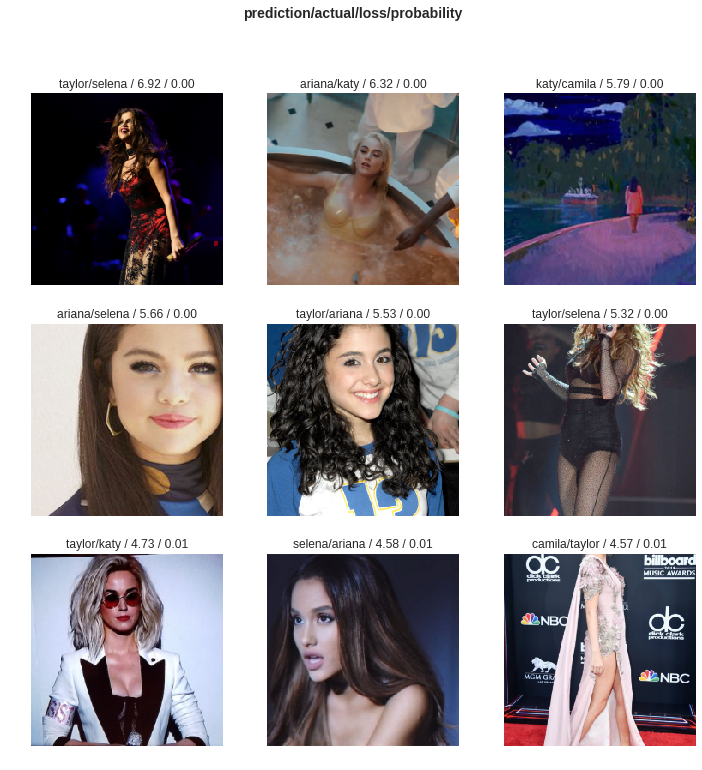

In [43]:
interp.plot_top_losses(9)

## Cleaning Up

Some of the losses aren't due to the model, but rather due to bad images in the data. The `FileDeleter` widget in `fastai.widgets` helps fix that by using manual help. First, we pull out the file paths from the top losses. There is a function to do just that!

In [0]:
from fastai.widgets import *

In [0]:
losses, idxes = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxes]

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Train)

In version 1.0.25, [ImageDeleter was merged into ImageCleaner](https://github.com/fastai/fastai/blob/master/CHANGES.md)

In [51]:
__version__

'1.0.42'

This doesn't work in Colab, sadly.

In [53]:
ImageCleaner(ds, idxs, path)

KeyboardInterrupt: ignored

Use the above to clean up the Train, Validation, and Test sets.

You can create Jupyter widgets by searching for `ipywidgets`

## Putting your model in production

It's easier to use a CPU in production rather than a GPU, to avoid the hassle of batches.

In [0]:
# fastai.defaults.device = torch.device('cpu')